![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [8]:
df = pd.read_csv('Hospitales_limpio', index_col=0)

In [9]:
df

,Edad,Diabetes,Hospitalizacion_Ultimo_Mes,PSA,Biopsias_Previas,Volumen_Prostatico,CUP,Enf_Cronica_Pulmonar_Obstructiva,Biopsia,Dias_Post_Biopsia_Complicacion,Fiebre,ITU,Hospitalizacion
0,53.0,0,0,4.0,0,1,0,0,NEG,1,1,0,1
1,56.0,0,0,7.7,0,1,0,0,NEG,1,1,0,1
2,57.0,0,0,29.0,1,1,0,0,NEG,1,1,0,1
3,56.0,0,0,7.0,0,1,0,0,NEG,1,1,0,1
4,55.0,0,0,29.0,1,1,0,0,NEG,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,57.0,0,0,4.8,0,0,0,0,NEG,NO,0,0,0
561,75.0,0,0,75.0,0,1,0,0,ADENOCARCINOMA GLEASON 8,NO,0,0,0
562,78.0,0,0,9.3,0,1,0,0,NEG,NO,0,0,0
563,67.0,0,0,6.0,0,1,0,0,ADENOCARCINOMA GLEASON 6,NO,0,0,0


Separen el dataset en X, y (variable objetivo)

In [104]:
X = df[['Edad', 'Diabetes', 'Hospitalizacion_Ultimo_Mes', 'PSA',
       'Biopsias_Previas', 'Volumen_Prostatico', 'CUP',
       'Enf_Cronica_Pulmonar_Obstructiva', 
       'Fiebre', 'ITU']]
y = df[['Hospitalizacion']]

Separen el dataset en X_train, X_test, y_train y y_test

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [130]:
modelo_arbol = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=1, min_samples_split=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

In [131]:
y_pred = modelo_arbol.predict(X_test)

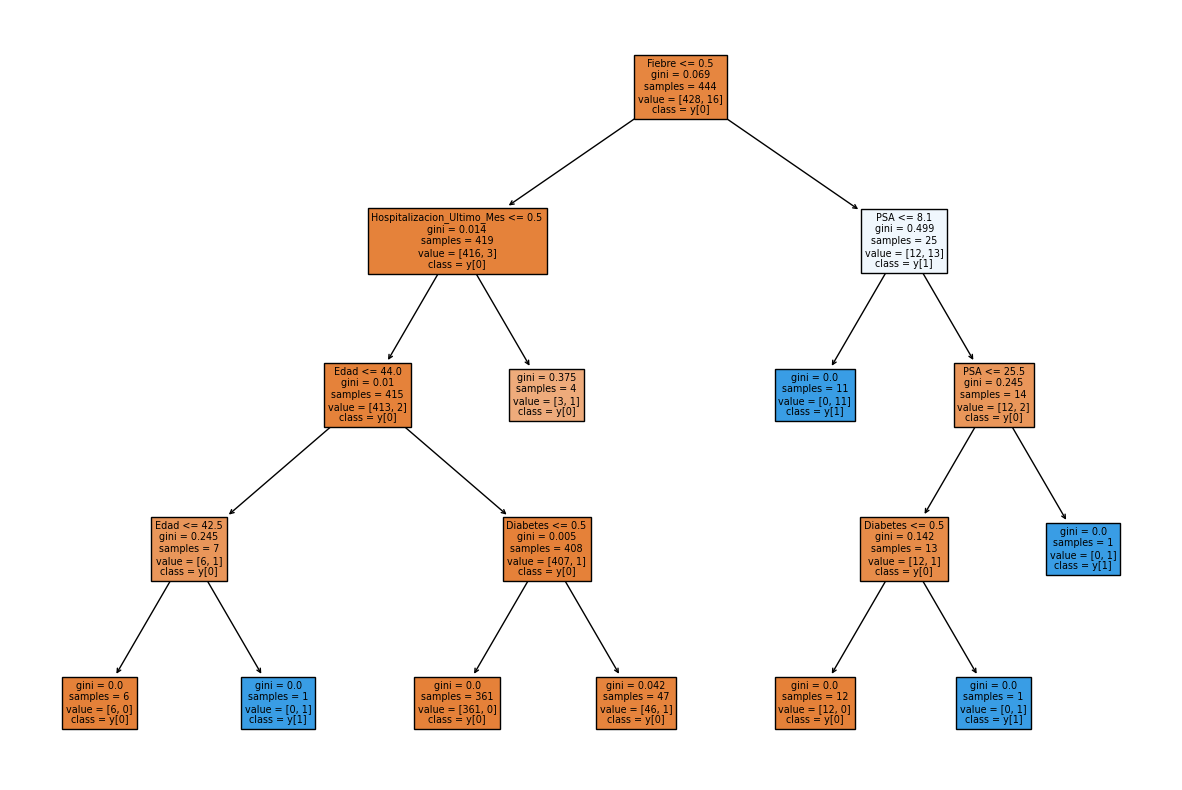

In [132]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(15, 10))
tree.plot_tree(modelo_arbol, filled=True, feature_names=X.columns, class_names=True)
plt.show()


In [133]:
X_test

,Edad,Diabetes,Hospitalizacion_Ultimo_Mes,PSA,Biopsias_Previas,Volumen_Prostatico,CUP,Enf_Cronica_Pulmonar_Obstructiva,Fiebre,ITU
241,63.0,0,0,4.4,0,0,0,0,0,0
384,68.0,0,0,11.0,0,1,0,0,0,0
57,68.0,0,0,6.0,0,1,0,0,0,0
391,64.0,0,0,7.0,0,1,0,0,0,0
72,63.0,0,0,8.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
12,69.0,0,0,5.7,0,0,0,0,1,0
291,67.0,0,0,22.6,0,1,0,0,0,0
23,69.0,0,0,14.0,0,1,0,0,1,1
385,63.0,0,0,21.3,1,1,0,0,1,0


Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

In [134]:
print("Precisión:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))


Precisión: 0.990990990990991
Matriz de Confusión:
 [[104   0]
 [  1   6]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       104
           1       1.00      0.86      0.92         7

    accuracy                           0.99       111
   macro avg       1.00      0.93      0.96       111
weighted avg       0.99      0.99      0.99       111



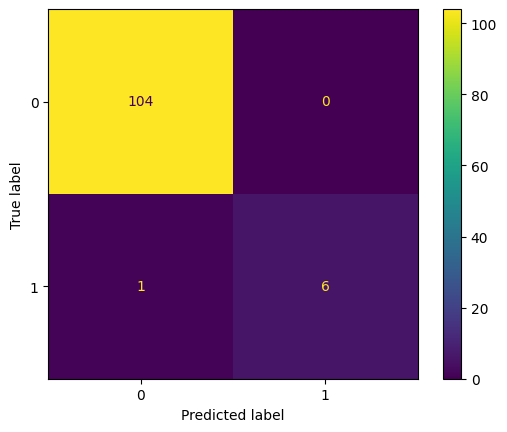

In [135]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_display.plot()
plt.show()

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [136]:
Exactitud = accuracy_score(y_test, y_pred)
Reporte = classification_report(y_test, y_pred)

#Se muestran los resultados
print(f'Precisión del modelo: {Exactitud:.4f}')
print('Reporte de clasificación:\n', Reporte)

Precisión del modelo: 0.9910
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       104
           1       1.00      0.86      0.92         7

    accuracy                           0.99       111
   macro avg       1.00      0.93      0.96       111
weighted avg       0.99      0.99      0.99       111



Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

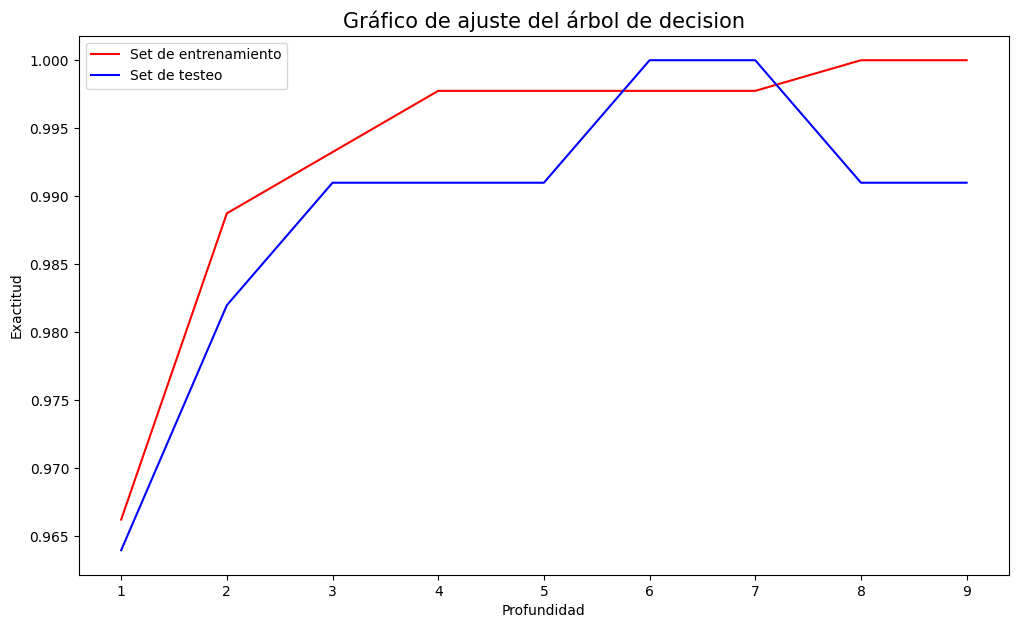

In [144]:
train_prec =  []
eval_prec = []

n_neighbors_list = list(range(1, 10))

for vecino in n_neighbors_list:
    clf_3 = DecisionTreeClassifier(max_depth=vecino, random_state= 42)
    clf_3.fit(X_train, y_train)
    train_prec.append(clf_3.score(X_train, y_train))
    eval_prec.append(clf_3.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(n_neighbors_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(n_neighbors_list, eval_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste del árbol de decision', fontsize = 15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad')
plt.show()

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

In [ ]:
3 - 4

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

Encuentre el valor óptimo para k

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

R/